<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/carretera.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 1

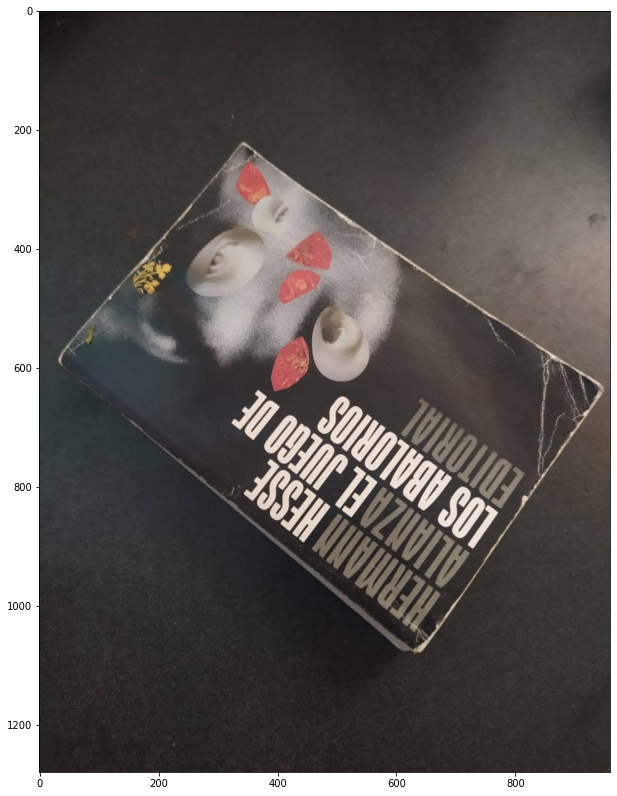

In [2]:
#Obtenga una imagen (libro, revista, etc..) por medio de su celular 
img = cv.imread("figuras/libro2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
plt.imshow(img)
plt.show()

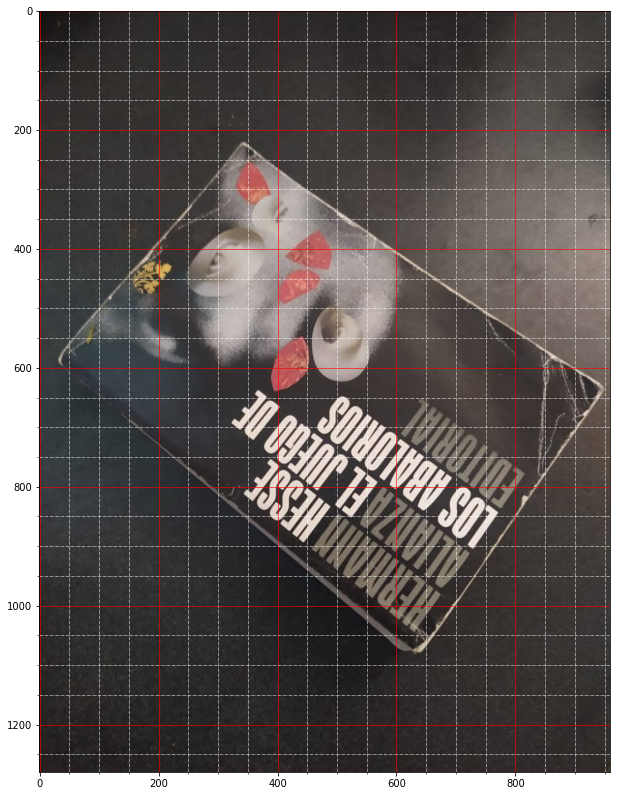

In [3]:
#Ampliar y mejorar la visibilidad del plano cartesiano
img = cv.imread("figuras/libro2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.6', color='red')
ax.grid(which='minor', linestyle='-.', linewidth='0.5', color='white')

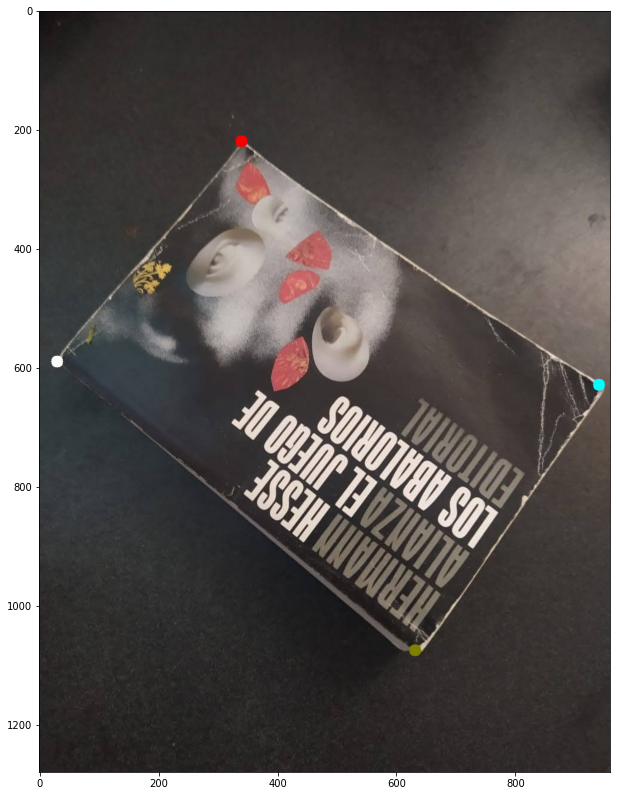

In [4]:
#Puntos de las esquinas
img = cv.imread("figuras/libro2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
cv.circle(img, (30, 590), 10, (250, 250, 250), -1) ; #white
cv.circle(img, (340, 220), 10, (250, 0, 0), -1) ; #red
cv.circle(img, (632, 1075), 10, (128, 128, 0), -1) ; #olive
cv.circle(img, (941, 629), 10, (0, 255, 255), -1) ; #cyan
plt.imshow(img)
plt.show()

In [5]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
pts1 = np.float32([[30, 590], [340, 220], [632, 1075], [941, 629]])
pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (500, 600))
print("forma de matrix: ", matrix.shape)
print("forma de img_warp: ", img_warp.shape)

forma de matrix:  (3, 3)
forma de img_warp:  (600, 500, 3)


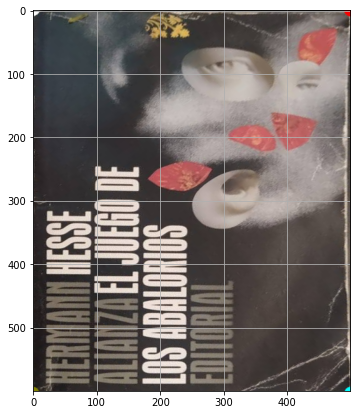

In [6]:
plt.figure(figsize=(10,7))
plt.imshow(img_warp)
plt.grid()
plt.show()

# Actividad 2

## Instrucciones

• Doblar una hoja de papel a lo ancho y tomarle una fotografía (con la perspectiva que se observa
la imagen de abajo)
• La foto debe de tener espacios a la izquierda y a la derecha
• Solo nos va interesar un 50% a un 30% de la imagen (la parte mas cercana al observador y esta
será la región de interés)
• Propuesta de tamaño final 480 x 240 (de la región de interés )
• Seguir los pasos del ejercicio anterior para la obtención de la vista aérea
• La imagen final resultante debe de ser lo más paralela posible
• En la imagen de la diapositiva siguiente se comprende mejor este proceso

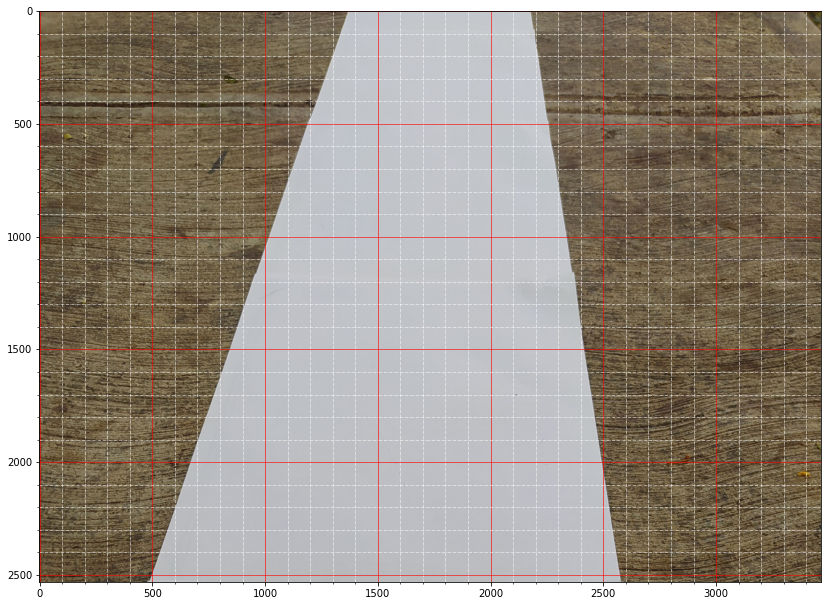

In [7]:
#Ampliar y mejorar la visibilidad del plano cartesiano
img = cv.imread("figuras/carretera.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.6', color='red')
ax.grid(which='minor', linestyle='-.', linewidth='0.5', color='white')

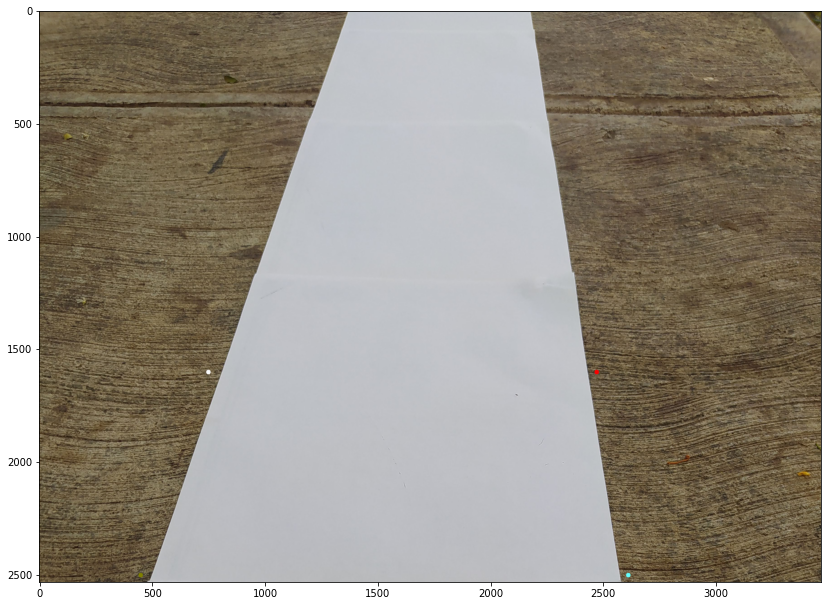

In [8]:
#Puntos de las esquinas
img = cv.imread("figuras/carretera.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
cv.circle(img, (750, 1600), 10, (250, 250, 250), -1) ; #white
cv.circle(img, (2470, 1600), 10, (250, 0, 0), -1) ; #red
cv.circle(img, (450, 2500), 10, (128, 128, 0), -1) ; #olive
cv.circle(img, (2610, 2500), 10, (100, 255, 255), -1) ; #cyan
plt.imshow(img)
plt.show()

In [9]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
pts1 = np.float32([[750, 1600], [2470, 1600], [450, 2500], [2610, 2500]])
pts2 = np.float32([[0, 0], [240, 0], [0, 480], [240, 480]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (240, 480))
print("forma de matrix: ", matrix.shape)
print("forma de img_warp: ", img_warp.shape)

forma de matrix:  (3, 3)
forma de img_warp:  (480, 240, 3)


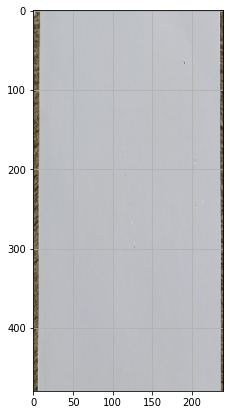

In [10]:
plt.figure(figsize=(10,7))
plt.imshow(img_warp)
plt.grid()
plt.show()

# Actividad 3

• Utilizando lo aprendido en la tarea anterior lleve a cabo la
binarizacion en la imagen con la transformación de perspectiva.
• No es necesario cambiar el tamaño de la imagen.
• Muestre las 3 imágenes como se muestra en el ejemplo

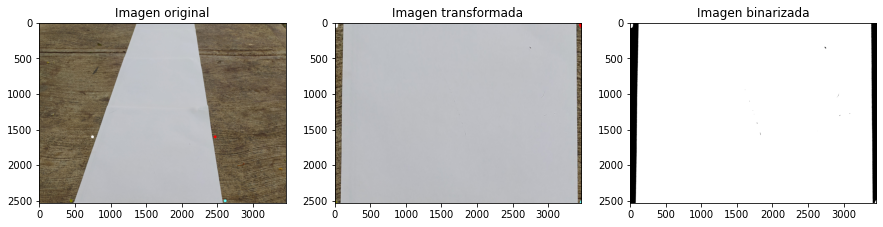

In [11]:
img = cv.imread("figuras/carretera.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#ubicando los puntos
cv.circle(img, (750, 1600), 20, (250, 250, 250), -1) ; #white
cv.circle(img, (2470, 1600), 20, (250, 0, 0), -1) ; #red
cv.circle(img, (450, 2500), 20, (128, 128, 0), -1) ; #olive
cv.circle(img, (2610, 2500), 20, (100, 255, 255), -1) ; #cyan

#acomodo y resize
pts1 = np.float32([[750, 1600], [2470, 1600], [450, 2500], [2610, 2500]])
pts2 = np.float32([[0, 0], [3464, 0], [0, 2531], [3464, 2531]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (3464, 2531))

#filtros
img_gray = cv.cvtColor(img_warp, cv.COLOR_BGR2GRAY) #cambio de colr
img_trans = cv.GaussianBlur(img_gray,(3,3),0) #filtro gausseano
thr, img_thr= cv.threshold(img_trans ,160 ,255,cv.THRESH_BINARY) #threshhold

#print
plt.figure(figsize=(15,9))
plt.subplot(131)
plt.imshow(img)
plt.title("Imagen original")
plt.subplot(132)
plt.imshow(img_warp)
plt.title("Imagen transformada")
plt.subplot(133)
plt.imshow(img_thr, cmap='gray')
plt.title("Imagen binarizada")
plt.show()